# Neural Network Training with Lux.jl

This notebook demonstrates how to train neural network parameters using the Lux.jl framework in Julia, including setup for reproducible results and parameter optimization.

In [8]:
using Lux, Random, Optimisers
using LorenzParameterEstimation
using Plots

# Set random seed for reproducibility
rng = Random.default_rng()
Random.seed!(rng, 42)

TaskLocalRNG()

In [9]:
# Initial condition (use explicit vector to avoid relying on non-exported utils)
u0 = [1.0, 1.0, 1.0]
M  = 20_000
T  = 100.0
dt = T / M

0.005

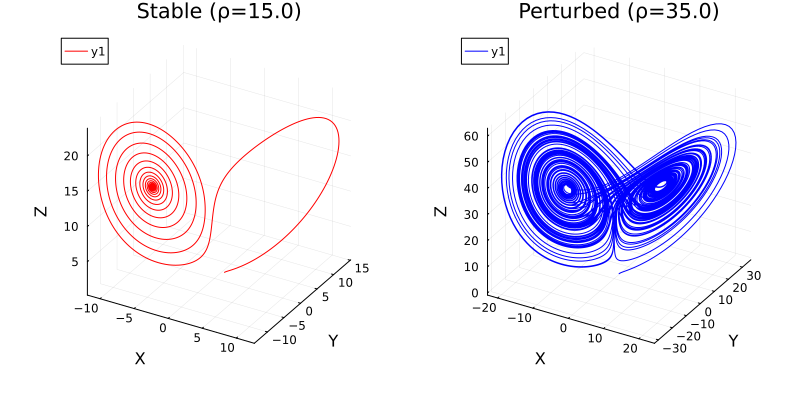

In [ ]:
true_params_stable  = stable_params()               # (10,15,8/3)   
perturbed_parameters= L63Parameters(10.0, 35.0, 8.0/3.0) 

# Integrate with the perturbed parameters
sol_perturbed = integrate(perturbed_parameters, u0, (0.0, T), dt)
sol_stable    = integrate(true_params_stable,  u0, (0.0, T), dt)

# Create 3D plots for comparison
p_stable = plot(sol_stable.u[:, 1], sol_stable.u[:, 2], sol_stable.u[:, 3];
                title="Stable (ρ=15.0)", xlabel="X", ylabel="Y", zlabel="Z",
                linecolor=:red)

p_perturbed = plot(sol_perturbed.u[:, 1], sol_perturbed.u[:, 2], sol_perturbed.u[:, 3];
                   title="Perturbed (ρ=35.0)", xlabel="X", ylabel="Y", zlabel="Z",
                   linecolor=:blue)

plot(p_stable, p_perturbed, layout=(1,2), size=(800,400))
